In [17]:
from simsopt import load
from simsopt.field import BiotSavart, Current, coils_via_symmetries, Coil
curves=load('/Users/rogeriojorge/local/microstability_optimization/src/joaquim_circular_coil/circurves_opt.json')
currents = [Current(-1) * 1e5 for c in curves]
coils = [Coil(curv, curr) for (curv, curr) in zip(curves, currents)]
bs = BiotSavart(coils)

[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x2b16275d0>],

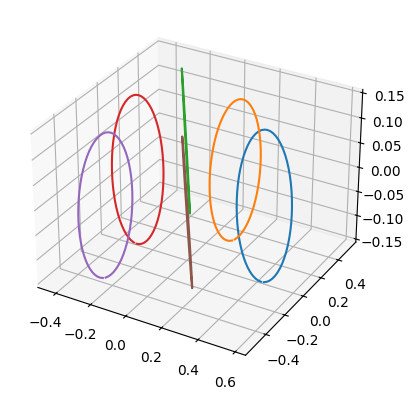

In [18]:
import matplotlib.pyplot as plt
ax = plt.figure().add_subplot(projection='3d')
[ax.plot(coil.curve.gamma()[:,0],coil.curve.gamma()[:,1],coil.curve.gamma()[:,2]) for coil in bs.coils]

In [21]:
import plotly.graph_objects as go
ax = go.Figure()
[ax.add_trace(go.Scatter3d(x=coil.curve.gamma()[:,0], y=coil.curve.gamma()[:,1], z=coil.curve.gamma()[:,2])) for coil in bs.coils]
ax.update_layout(scene_aspectmode="data")
# ax.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'scatter3d',
              'x': array([0.43125001, 0.41557074, 0.40006325, 0.38489746, 0.37023951, 0.35625001,
                          0.34308222, 0.33088041, 0.31977828, 0.30989746, 0.3013462 , 0.29421819,
                          0.28859153, 0.28452787, 0.28207172, 0.28125001, 0.28207172, 0.28452787,
                          0.28859153, 0.29421819, 0.3013462 , 0.30989746, 0.31977828, 0.33088042,
                          0.34308222, 0.35625001, 0.37023951, 0.38489746, 0.40006325, 0.41557074,
                          0.43125001, 0.44692928, 0.46243676, 0.47760256, 0.4922605 , 0.50625001,
                          0.51941779, 0.5316196 , 0.54272173, 0.55260256, 0.56115382, 0.56828183,
                          0.57390848, 0.57797215, 0.58042829, 0.58125001, 0.58042829, 0.57797215,
                          0.57390848, 0.56828182, 0.56115382, 0.55260256, 0.54272173, 0.5316196 ,
                          0.51941779, 0.50625001, 0.4922605 , 0.47760255, 0.46243676, 0.44692928]),
              'y': array([-1.94560375e-02, -1.93494546e-02, -1.90308750e-02, -1.85037890e-02,
                          -1.77739716e-02, -1.68494186e-02, -1.57402598e-02, -1.44586474e-02,
                          -1.30186228e-02, -1.14359634e-02, -9.72800912e-03, -7.91347260e-03,
                          -6.01223432e-03, -4.04512463e-03, -2.03369561e-03,  1.51036344e-08,
                           2.03372576e-03,  4.04515459e-03,  6.01226397e-03,  7.91350182e-03,
                           9.72803780e-03,  1.14359915e-02,  1.30186501e-02,  1.44586738e-02,
                           1.57402854e-02,  1.68494431e-02,  1.77739950e-02,  1.85038114e-02,
                           1.90308962e-02,  1.93494747e-02,  1.94560563e-02,  1.93494735e-02,
                           1.90308938e-02,  1.85038079e-02,  1.77739904e-02,  1.68494375e-02,
                           1.57402787e-02,  1.44586662e-02,  1.30186417e-02,  1.14359823e-02,
                           9.72802795e-03,  7.91349143e-03,  6.01225315e-03,  4.04514346e-03,
                           2.03371444e-03,  3.72717788e-09, -2.03370693e-03, -4.04513576e-03,
                          -6.01224514e-03, -7.91348299e-03, -9.72801897e-03, -1.14359726e-02,
                          -1.30186313e-02, -1.44586550e-02, -1.57402665e-02, -1.68494243e-02,
                          -1.77739762e-02, -1.85037925e-02, -1.90308774e-02, -1.93494558e-02]),
              'z': array([-1.48732861e-01, -1.47918087e-01, -1.45482691e-01, -1.41453357e-01,
                          -1.35874230e-01, -1.28806436e-01, -1.20327413e-01, -1.10530057e-01,
                          -9.95217110e-02, -8.74229843e-02, -7.43664330e-02, -6.04951077e-02,
                          -4.59609853e-02, -3.09233048e-02, -1.55468222e-02, -5.40598218e-09,
                           1.55468114e-02,  3.09232940e-02,  4.59609745e-02,  6.04950969e-02,
                           7.43664222e-02,  8.74229735e-02,  9.95217002e-02,  1.10530046e-01,
                           1.20327402e-01,  1.28806426e-01,  1.35874219e-01,  1.41453346e-01,
                           1.45482680e-01,  1.47918076e-01,  1.48732850e-01,  1.47918076e-01,
                           1.45482680e-01,  1.41453346e-01,  1.35874219e-01,  1.28806426e-01,
                           1.20327402e-01,  1.10530046e-01,  9.95217002e-02,  8.74229735e-02,
                           7.43664222e-02,  6.04950969e-02,  4.59609745e-02,  3.09232940e-02,
                           1.55468114e-02, -5.40598226e-09, -1.55468222e-02, -3.09233048e-02,
                          -4.59609853e-02, -6.04951077e-02, -7.43664330e-02, -8.74229843e-02,
                          -9.95217110e-02, -1.10530057e-01, -1.20327413e-01, -1.28806436e-01,
                          -1.35874230e-01, -1.41453357e-01, -1.45482691e-01, -1.47918087e-01])},
             {'type': 'scatter3d',
              'x': array([0.12196257, 0.11422972, 0.10679758, 0.09974757, 0.09315693, 0.08709788,
                